<a href="https://colab.research.google.com/github/willismax/MediaSystem-Python-Course/blob/main/01.Intro-Python/10%E5%88%86%E9%90%98Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10分鐘的Pandas入門-繁中版

來自Pandas官方文件
- 原文詳見: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
- 正體中文: https://hackmd.io/@wiimax/10-minutes-to-pandas


- 此份介紹源自官方文件，是對Pandas的簡短介紹，~~其實一點也不短~~。您可以在官方[Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook)中看到更多的內容。

- 需要使用的模組

In [1]:
import numpy as np
import pandas as pd

- 後續繪圖會使用的模組


In [2]:
import matplotlib.pyplot as plt

## pandas 的基本資料結構

Pandas 提供了兩種類型的類別來處理資料：

1.  [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series "貓熊系列")：保存任何類型資料的一維數值組合。例如整數、字串、Python 物件等。
2.  [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame "pandas.DataFrame")：一種二維資料結構，用於保存數據，例如二維數組或具有行和列的表格。


## Object creation 創建物件

- 參閱官方文件[Data Structure Intro section](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro)
- 通過傳入一個list創建[Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series)，pandas預設會產生整數的[RangeIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.RangeIndex.html#pandas.RangeIndex)。


In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame "pandas.DataFrame")透過使用帶有標籤的list傳遞帶有日期時間索引的 NumPy 數組來建立[`date_range()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html#pandas.date_range "pandas.date_range")：

In [6]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-2.309878,-1.129558,1.354348,0.115821
2013-01-02,0.885026,0.675703,-0.596860,-0.175910
2013-01-03,0.725105,0.866666,-0.070014,1.529645
2013-01-04,0.494061,1.532490,-0.454917,-0.569073
2013-01-05,0.554051,0.146427,0.825864,0.124716
2013-01-06,1.262556,-0.823893,1.846567,-0.393803


- [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame "pandas.DataFrame")以字典`dict`:`{Key:Value}`創建`DataFrame`，其中Key是列標籤、Value是列之值。

In [4]:
df2 = pd.DataFrame(
    {'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'}
    )
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


[`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame "pandas.DataFrame")欄位可以有不同的資料結構 [dtypes](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes)：

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

- 如果用IPython、Jupyter notebook等筆記本形式使用`Tab`可自動展示補全所有的屬性、自定義欄位。


In [ ]:
#df2.<tab>

![image](https://hackmd.io/_uploads/BkrzLCV10.png)

## Viewing data 檢視資料

參閱[Basics section](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics)  

以`.head(n)`查前n筆資料、以`tail(n)`查看末n筆資料。

In [ ]:
df.head()

,A,B,C,D
2013-01-01,-0.275297,-0.615197,0.098480,-1.569252
2013-01-02,-0.629435,1.172478,2.025126,-1.364893
2013-01-03,1.961387,0.387696,-2.114131,-1.421082
2013-01-04,0.166945,1.264534,1.234071,-2.123566
2013-01-05,-0.542935,0.183387,-0.426700,0.443767


In [ ]:
df.tail(3)

,A,B,C,D,E,F
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


以`.index`, `.columns`顯示索引及欄位名稱。


In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

`DataFrame.to_numpy()`轉換為`NumPy`。
> 但請注意如果該`DataFrame`具有不同資料型態(int、str...)，這可能是一項昂貴的操作，主因是NumPy數組對整個數組有一個dtype，而pandas DataFrames每列有一個dtype。當呼叫時 DataFrame.to_numpy()，pandas會找到可以容納 DataFrame中所有 dtypes 的NumPy dtype。這可能最終成為object，這需要將每個值都轉換為Python物件。

In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

- 以下df的DataFrame值皆為浮點數，` DataFrame.to_numpy()`就相當快。


In [11]:
df.to_numpy()

array([[-2.30987828, -1.12955827,  1.35434755,  0.11582124],
       [ 0.88502567,  0.675703  , -0.59685986, -0.17591021],
       [ 0.72510479,  0.86666626, -0.07001442,  1.52964535],
       [ 0.4940606 ,  1.53249036, -0.45491729, -0.56907326],
       [ 0.55405095,  0.14642738,  0.82586401,  0.12471647],
       [ 1.26255598, -0.82389326,  1.84656687, -0.39380253]])

- 以下df2的`DataFrame`有不同`dtypes`，運算代價高


In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

>Note DataFrame.to_numpy() does not include the index or column labels in the output.

以`describe()`快速檢視數據統計摘要

In [ ]:
df.describe()

,0,1,2,3
count,10.000000,10.000000,10.000000,10.000000
mean,0.493184,-0.006870,-0.662426,-0.215356
std,0.937321,0.634647,1.125282,0.668763
min,-0.406372,-1.065897,-2.243619,-1.130796
25%,-0.296070,-0.365314,-1.247031,-0.612986
50%,0.210086,-0.101766,-0.829783,-0.465157
75%,1.268923,0.407116,0.158077,0.168614
max,1.945387,0.922616,0.927221,1.135062


以`T`轉置資料矩陣(列、欄互換)


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9
0,1.945387,-0.219103,1.513958,-0.406372,-0.384594,1.850298,0.533818,-0.321725,0.183219,0.236954
1,0.520786,-1.065897,-0.337300,-0.248149,0.066106,0.044617,0.922616,-0.374652,0.895682,-0.492512
2,-2.243619,-0.359255,0.330522,0.927221,-1.298315,-1.002366,-1.093181,-2.127500,-0.657199,0.899433
3,0.417304,0.067595,-0.780844,-1.130796,0.202287,1.135062,-0.469699,-0.460614,-0.474805,-0.659047


依軸排序`sort_index(axis=1, ascending=False)`，結果為以ROW、遞增排序。


In [16]:
df

,A,B,C,D
2013-01-01,-2.309878,-1.129558,1.354348,0.115821
2013-01-02,0.885026,0.675703,-0.596860,-0.175910
2013-01-03,0.725105,0.866666,-0.070014,1.529645
2013-01-04,0.494061,1.532490,-0.454917,-0.569073
2013-01-05,0.554051,0.146427,0.825864,0.124716
2013-01-06,1.262556,-0.823893,1.846567,-0.393803


In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.115821,1.354348,-1.129558,-2.309878
2013-01-02,-0.175910,-0.596860,0.675703,0.885026
2013-01-03,1.529645,-0.070014,0.866666,0.725105
2013-01-04,-0.569073,-0.454917,1.532490,0.494061
2013-01-05,0.124716,0.825864,0.146427,0.554051
2013-01-06,-0.393803,1.846567,-0.823893,1.262556


[`DataFrame.sort_values()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values "pandas.DataFrame.sort_values")按值排序：


In [20]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-2.309878,-1.129558,1.354348,0.115821
2013-01-06,1.262556,-0.823893,1.846567,-0.393803
2013-01-05,0.554051,0.146427,0.825864,0.124716
2013-01-02,0.885026,0.675703,-0.596860,-0.175910
2013-01-03,0.725105,0.866666,-0.070014,1.529645
2013-01-04,0.494061,1.532490,-0.454917,-0.569073


## Selection 選取

>注意，雖然標準的`Python`、`numpy`表達式直觀可用，但建議以`Pandas`優化的選擇方法，如[`DataFrame.at()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at "pandas.DataFrame.at")、[`DataFrame.iat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat "pandas.DataFrame.iat")和 。[`DataFrame.loc()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc "pandas.DataFrame.loc") [`DataFrame.iloc()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc "pandas.DataFrame.iloc")
。

參閱文件[Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced).

### Getting 取得資料


- 選取單一欄位，將會回傳一個`Series`, `df['A']`相當於`df.A`:


In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.499499,0.588333,-0.320680,0.946536
2013-01-02,1.401896,-0.859405,1.595538,-0.188253
2013-01-03,-1.170969,1.165388,-0.369580,0.050639
2013-01-04,0.061076,-1.472339,1.019217,2.295793
2013-01-05,0.247691,-0.391888,0.720181,0.735476
2013-01-06,0.596714,1.536449,0.282936,0.909580


In [ ]:
df['A']

2013-01-01   -1.499499
2013-01-02    1.401896
2013-01-03   -1.170969
2013-01-04    0.061076
2013-01-05    0.247691
2013-01-06    0.596714
Freq: D, Name: A, dtype: float64

- 以中括號`[]`選擇想要的rows進行切片


In [ ]:
df[0:3]

,A,B,C,D
2013-01-01,-1.499499,0.588333,-0.320680,0.946536
2013-01-02,1.401896,-0.859405,1.595538,-0.188253
2013-01-03,-1.170969,1.165388,-0.369580,0.050639


In [ ]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.401896,-0.859405,1.595538,-0.188253
2013-01-03,-1.170969,1.165388,-0.369580,0.050639
2013-01-04,0.061076,-1.472339,1.019217,2.295793


### 以標籤進行選擇


參閱[Selection by Label](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label)了解更多

- 使用標籤取得交叉區域:


In [ ]:
df.loc[dates[0]]

A   -1.499499
B    0.588333
C   -0.320680
D    0.946536
Name: 2013-01-01 00:00:00, dtype: float64

- 以標籤取得多欄位數據


In [ ]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-1.499499,0.588333
2013-01-02,1.401896,-0.859405
2013-01-03,-1.170969,1.165388
2013-01-04,0.061076,-1.472339
2013-01-05,0.247691,-0.391888
2013-01-06,0.596714,1.536449


- 以標籤組合切片:


In [ ]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,1.401896,-0.859405
2013-01-03,-1.170969,1.165388
2013-01-04,0.061076,-1.472339


- 以標籤組合縮減顯示維度:

In [ ]:
df.loc['20130102', ['A', 'B']]

A    1.401896
B   -0.859405
Name: 2013-01-02 00:00:00, dtype: float64

- 獲取單筆數值:


In [ ]:
df.loc[dates[0], 'A']

-1.4994985714501923

In [ ]:
df.at[dates[0], 'A']

-1.4994985714501923

> `loc`以標籤取得Rows數據，`iloc`以行號取得數據。


### Selection by position 以位置選擇


- 在[Selection by Position](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer)查看更多

- 以整數數值選擇:

In [ ]:
df.iloc[3]

A    0.061076
B   -1.472339
C    1.019217
D    2.295793
Name: 2013-01-04 00:00:00, dtype: float64

- 以整數切片，使用方式類似`numpy`、`python`風格:


In [ ]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.061076,-1.472339
2013-01-05,0.247691,-0.391888


- 以list指定位置，使用方式類似`numpy`、`python`風格:

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.401896,1.595538
2013-01-03,-1.170969,-0.369580
2013-01-05,0.247691,0.720181


- 對行rows切片:


In [ ]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.401896,-0.859405,1.595538,-0.188253
2013-01-03,-1.170969,1.165388,-0.369580,0.050639


- 對欄columns切片:


In [ ]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.588333,-0.320680
2013-01-02,-0.859405,1.595538
2013-01-03,1.165388,-0.369580
2013-01-04,-1.472339,1.019217
2013-01-05,-0.391888,0.720181
2013-01-06,1.536449,0.282936


- 取得特定值:


In [ ]:
df.iloc[1, 1]

-0.8594052379894221

In [ ]:
df.iat[1, 1]

-0.8594052379894221

### Boolean indexing 布林索引


- 以單欄的值選取數據


In [ ]:
df[df.A > 0]

,A,B,C,D
2013-01-02,1.401896,-0.859405,1.595538,-0.188253
2013-01-04,0.061076,-1.472339,1.019217,2.295793
2013-01-05,0.247691,-0.391888,0.720181,0.735476
2013-01-06,0.596714,1.536449,0.282936,0.909580


- 以`where`條件判斷選擇數據


In [ ]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.588333,NaN,0.946536
2013-01-02,1.401896,NaN,1.595538,NaN
2013-01-03,NaN,1.165388,NaN,0.050639
2013-01-04,0.061076,NaN,1.019217,2.295793
2013-01-05,0.247691,NaN,0.720181,0.735476
2013-01-06,0.596714,1.536449,0.282936,0.909580


- 以`isin()`方法篩選數據:


In [ ]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.499499,0.588333,-0.320680,0.946536,one
2013-01-02,1.401896,-0.859405,1.595538,-0.188253,one
2013-01-03,-1.170969,1.165388,-0.369580,0.050639,two
2013-01-04,0.061076,-1.472339,1.019217,2.295793,three
2013-01-05,0.247691,-0.391888,0.720181,0.735476,four
2013-01-06,0.596714,1.536449,0.282936,0.909580,three


In [ ]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.170969,1.165388,-0.369580,0.050639,two
2013-01-05,0.247691,-0.391888,0.720181,0.735476,four


### Setting 設置


- 設置新欄位column將自動以index對齊資料


In [ ]:
s1 = pd.Series(
    [1, 2, 3, 4, 5, 6],
    index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [ ]:
df['F'] = s1

- 以標籤更新數值:


In [ ]:
df.at[dates[0], 'A'] = 0

- 以位置更新數值:

In [ ]:
df.iat[0, 1] = 0

- 以NumPy array更新


In [ ]:
df.loc[:, 'D'] = np.array([5] * len(df))

<ipython-input-85-38ea1d699f7d>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'D'] = np.array([5] * len(df))


- df依前述操作更新結果


In [ ]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.320680,5,NaN
2013-01-02,1.401896,-0.859405,1.595538,5,1.0
2013-01-03,-1.170969,1.165388,-0.369580,5,2.0
2013-01-04,0.061076,-1.472339,1.019217,5,3.0
2013-01-05,0.247691,-0.391888,0.720181,5,4.0
2013-01-06,0.596714,1.536449,0.282936,5,5.0


- 以`where`條件判斷運算子更新值


In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.320680,-5,NaN
2013-01-02,-1.401896,-0.859405,-1.595538,-5,-1.0
2013-01-03,-1.170969,-1.165388,-0.369580,-5,-2.0
2013-01-04,-0.061076,-1.472339,-1.019217,-5,-3.0
2013-01-05,-0.247691,-0.391888,-0.720181,-5,-4.0
2013-01-06,-0.596714,-1.536449,-0.282936,-5,-5.0


## Missing data 缺失值處裡


- `pandas`以`np.nan`表示缺失值，預設情況不進行運算，參閱 [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data)

- `.reindex()`可以修改/增加/刪除索引，將回傳一個數據的副本

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.320680,5,NaN,1.0
2013-01-02,1.401896,-0.859405,1.595538,5,1.0,1.0
2013-01-03,-1.170969,1.165388,-0.369580,5,2.0,NaN
2013-01-04,0.061076,-1.472339,1.019217,5,3.0,NaN


- 丟掉有區失值的行


In [ ]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.401896,-0.859405,1.595538,5,1.0,1.0


- 對缺失值賦值

In [ ]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.320680,5,5.0,1.0
2013-01-02,1.401896,-0.859405,1.595538,5,1.0,1.0
2013-01-03,-1.170969,1.165388,-0.369580,5,2.0,5.0
2013-01-04,0.061076,-1.472339,1.019217,5,3.0,5.0


- 以`.isna()`使用布林遮罩


In [ ]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations 操作


 參閱[Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-binop)。

### Stats 統計

- 操作通常不包含缺失項(缺失要先預處理)

- 執行敘述統計-按列

In [ ]:
df.mean()

A    0.189401
B   -0.003632
C    0.487935
D    5.000000
F    3.000000
dtype: float64

- 執行敘述統計-按欄


In [ ]:
df.mean(1)

2013-01-01    1.169830
2013-01-02    1.627606
2013-01-03    1.324968
2013-01-04    1.521591
2013-01-05    1.915197
2013-01-06    2.483220
Freq: D, dtype: float64

- 如要操作不同維度需先對齊，Pandas會自動沿著指定維度廣播(broadcasting)


In [ ]:
#以時間為index對齊
#.shift(2)為資料沿軸順移2位
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.170969,0.165388,-1.369580,4.0,1.0
2013-01-04,-2.938924,-4.472339,-1.980783,2.0,0.0
2013-01-05,-4.752309,-5.391888,-4.279819,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply 應用


- 以Applying functions進行資料處理:


In [ ]:
df.apply(np.cumsum) #累加

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.320680,5,NaN
2013-01-02,1.401896,-0.859405,1.274858,10,1.0
2013-01-03,0.230927,0.305983,0.905278,15,3.0
2013-01-04,0.292003,-1.166356,1.924494,20,6.0
2013-01-05,0.539694,-1.558244,2.644676,25,10.0
2013-01-06,1.136408,-0.021795,2.927612,30,15.0


In [ ]:
df.apply(lambda x: x.max() - x.min())

A    2.572864
B    3.008788
C    1.965119
D    0.000000
F    4.000000
dtype: float64

### Histogramming 直方圖


- 至[Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-discretization)了解更多.

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    3
2    4
3    3
4    5
5    5
6    3
7    6
8    5
9    1
dtype: int64

In [ ]:
s.value_counts()

3    3
5    3
6    2
4    1
1    1
dtype: int64

### String Methods 字串處理方法


- `Pandas.Series`在`.str`屬性中配備了一組字符串處理方法，可以輕鬆地對數組的每個元素進行操作，如下面的代碼片段所示。請注意，str中的模式匹配通常默認使用[正則表達式](https://docs.python.org/3/library/re.html)（在某些情況下總是使用它們）。在[Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods)中查看更多信息。

In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge合併

### Concat連接


- pandas提供各種簡易的合併Series及Dataframe物件操作方式，參閱[Merging section](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging)

- 以`concat()`連接pandas物件:


In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.506593,-0.281081,0.746550,1.735186
1,0.989668,0.185910,-1.778557,0.581550
2,0.721338,2.238897,-0.962611,0.539238
3,0.834441,-0.933721,-0.189241,0.671273
4,0.450458,0.528146,0.543115,0.932024
5,1.513235,-0.702748,0.704447,-0.450666
6,0.681953,0.028782,-0.113496,-0.766260
7,-1.170186,1.762876,-0.727707,1.141059
8,-0.798267,1.301011,1.038994,0.186938
9,-0.420932,-0.383501,0.358864,1.501124


In [ ]:
 #break it into pieces
pieces = [df[:3], df[3:7], df[7:]] #分段
pd.concat(pieces)

,0,1,2,3
0,0.506593,-0.281081,0.746550,1.735186
1,0.989668,0.185910,-1.778557,0.581550
2,0.721338,2.238897,-0.962611,0.539238
3,0.834441,-0.933721,-0.189241,0.671273
4,0.450458,0.528146,0.543115,0.932024
5,1.513235,-0.702748,0.704447,-0.450666
6,0.681953,0.028782,-0.113496,-0.766260
7,-1.170186,1.762876,-0.727707,1.141059
8,-0.798267,1.301011,1.038994,0.186938
9,-0.420932,-0.383501,0.358864,1.501124


### Join


- 可以採用SQL style合併。參閱[Database style joining](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join)章節。

In [ ]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [ ]:
 left

,key,lval
0,foo,1
1,foo,2


In [ ]:
right

,key,rval
0,foo,4
1,foo,5


In [ ]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


- 另一個例子:


In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [ ]:
left

,key,lval
0,foo,1
1,bar,2


In [ ]:
right

,key,rval
0,foo,4
1,bar,5


In [ ]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append 附加


- 將行附加到dataframe，參見[Appending](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-concatenation)章節


In [ ]:
df = pd.DataFrame(np.random.randn(8, 4),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.465658,-1.075169,0.617987,-0.342043
1,-0.197874,-0.968206,0.196510,-0.187232
2,0.506648,2.992342,-0.599497,-1.286293
3,-1.272168,-0.489292,1.010860,1.305199
4,0.143837,-1.327609,1.118387,1.001737
5,0.849845,-0.643569,0.109421,-1.112806
6,0.983866,0.262710,-1.127821,-0.549913
7,-0.326946,-1.971215,-0.901548,-0.715908


In [ ]:
s = df.iloc[3]
df.append(s, ignore_index=True) #新增附加在最後一row

<ipython-input-112-f31b970c0fa3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True) #新增附加在最後一row


,A,B,C,D
0,0.465658,-1.075169,0.617987,-0.342043
1,-0.197874,-0.968206,0.196510,-0.187232
2,0.506648,2.992342,-0.599497,-1.286293
3,-1.272168,-0.489292,1.010860,1.305199
4,0.143837,-1.327609,1.118387,1.001737
5,0.849845,-0.643569,0.109421,-1.112806
6,0.983866,0.262710,-1.127821,-0.549913
7,-0.326946,-1.971215,-0.901548,-0.715908
8,-1.272168,-0.489292,1.010860,1.305199


## Grouping 分組


- 透過“group by”將數據對每個分組應用不同的function並結合展示成果，過程為:
    - 依據某種標準將數據拆分(Splitting)為組
    - 將設計好的功能(applying)對每個組獨立處理。
    - 結合(Combining)成果至資料結構
- 參閱[Grouping](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)章節.

In [ ]:
pd.DataFrame(
    {
        'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C': np.random.randn(8),
        'D': np.random.randn(8)})
df

,A,B,C,D
0,0.465658,-1.075169,0.617987,-0.342043
1,-0.197874,-0.968206,0.196510,-0.187232
2,0.506648,2.992342,-0.599497,-1.286293
3,-1.272168,-0.489292,1.010860,1.305199
4,0.143837,-1.327609,1.118387,1.001737
5,0.849845,-0.643569,0.109421,-1.112806
6,0.983866,0.262710,-1.127821,-0.549913
7,-0.326946,-1.971215,-0.901548,-0.715908


    - 分組然後將`sum()`應用於結果


In [ ]:
df.groupby('A').sum()

,B,C,D
A,,,
-1.272168,-0.489292,1.010860,1.305199
-0.326946,-1.971215,-0.901548,-0.715908
-0.197874,-0.968206,0.196510,-0.187232
0.143837,-1.327609,1.118387,1.001737
0.465658,-1.075169,0.617987,-0.342043
0.506648,2.992342,-0.599497,-1.286293
0.849845,-0.643569,0.109421,-1.112806
0.983866,0.262710,-1.127821,-0.549913


- 以多欄位分組形成分層索引，並應用`sum()`

In [ ]:
df.groupby(['A', 'B']).sum()

,,C,D
A,B,,
-1.272168,-0.489292,1.010860,1.305199
-0.326946,-1.971215,-0.901548,-0.715908
-0.197874,-0.968206,0.196510,-0.187232
0.143837,-1.327609,1.118387,1.001737
0.465658,-1.075169,0.617987,-0.342043
0.506648,2.992342,-0.599497,-1.286293
0.849845,-0.643569,0.109421,-1.112806
0.983866,0.262710,-1.127821,-0.549913


## Reshaping 重塑


參閱[Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-stacking)章節內容

### Stack 堆疊


In [ ]:
tuples = list(zip(
    *[['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
     ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']
      ]))

In [ ]:
#pandas.MultiIndex.from_tuples將包含多個list的元組轉換為複雜索引
index = pd.MultiIndex.from_tuples(tuples,names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2),index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.710291 -1.479791
      two     0.875259  1.023774
baz   one     0.884763  1.480898
      two     0.346070  0.415916

- 使用`stack()`方法將DataFrame壓縮(compresses) 為階層形式的欄位


In [ ]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.710291
               B   -1.479791
       two     A    0.875259
               B    1.023774
baz    one     A    0.884763
               B    1.480898
       two     A    0.346070
               B    0.415916
dtype: float64

- 使用堆疊的DataFrame或Series（具有階層索引），與`stack()`相反的操作為`unstack()`，預設情況下為取消堆疊最後一級：


In [ ]:
stacked.unstack()

A         B
first second                    
bar   one    -1.710291 -1.479791
      two     0.875259  1.023774
baz   one     0.884763  1.480898
      two     0.346070  0.415916

In [ ]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.710291  0.875259
      B -1.479791  1.023774
baz   A  0.884763  0.346070
      B  1.480898  0.415916

In [ ]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.710291  0.884763
       B -1.479791  1.480898
two    A  0.875259  0.346070
       B  1.023774  0.415916

### Pivot tables


- 參閱[Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot)

In [ ]:
df = pd.DataFrame(
    {
        'A': ['one', 'one', 'two', 'three'] * 3,
        'B': ['A', 'B', 'C'] * 4,
        'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
        'D': np.random.randn(12),
        'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.824232,0.255415
1,one,B,foo,-0.067862,0.043096
2,two,C,foo,1.926482,-0.552633
3,three,A,bar,-0.195924,-0.291658
4,one,B,bar,-1.003934,-0.300346
5,one,C,bar,-2.524319,-0.837348
6,two,A,foo,-1.333094,-0.871478
7,three,B,foo,0.476729,-1.854530
8,one,C,foo,-0.252663,0.277326
9,one,A,bar,2.498511,-0.061539


- 我們可以非常輕鬆地從這些數據生成數據透視表：


In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  2.498511  1.824232
      B -1.003934 -0.067862
      C -2.524319 -0.252663
three A -0.195924       NaN
      B       NaN  0.476729
      C -0.523206       NaN
two   A       NaN -1.333094
      B -0.274002       NaN
      C       NaN  1.926482

## Time series 時間序列


- pandas具有簡單，強大且高效的功能，用於在頻率轉換期間執行重採樣操作（例如，將第二數據轉換為5分鐘數據）。這在財務應用程序中非常常見，但不僅限於此。請參閱[Time Series](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries)章節


In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    24784
Freq: 5T, dtype: int64

- 時區呈現：


In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.483841
2012-03-07   -0.164481
2012-03-08    0.614097
2012-03-09    0.351788
2012-03-10   -0.248191
Freq: D, dtype: float64

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.483841
2012-03-07 00:00:00+00:00   -0.164481
2012-03-08 00:00:00+00:00    0.614097
2012-03-09 00:00:00+00:00    0.351788
2012-03-10 00:00:00+00:00   -0.248191
Freq: D, dtype: float64

- 轉換為另一個時區：


In [ ]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.483841
2012-03-06 19:00:00-05:00   -0.164481
2012-03-07 19:00:00-05:00    0.614097
2012-03-08 19:00:00-05:00    0.351788
2012-03-09 19:00:00-05:00   -0.248191
Freq: D, dtype: float64

- 在不同時間跨度表示間轉換：

In [ ]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.153932
2012-02-29   -0.835085
2012-03-31    0.028227
2012-04-30   -0.655432
2012-05-31    1.244615
Freq: M, dtype: float64

In [ ]:
# to_period()默認頻率為M，to_period和to_timestamp可互相轉換
ps = ts.to_period()
ps

2012-01   -0.153932
2012-02   -0.835085
2012-03    0.028227
2012-04   -0.655432
2012-05    1.244615
Freq: M, dtype: float64

In [ ]:
ts.to_timestamp()

1990-03-01 09:00:00    0.584690
1990-06-01 09:00:00   -0.828538
1990-09-01 09:00:00   -0.158001
1990-12-01 09:00:00    1.100224
1991-03-01 09:00:00   -0.304490
1991-06-01 09:00:00    0.847983
1991-09-01 09:00:00   -0.340576
1991-12-01 09:00:00   -2.338990
1992-03-01 09:00:00   -0.291900
1992-06-01 09:00:00    0.538667
1992-09-01 09:00:00   -0.765538
1992-12-01 09:00:00   -0.831230
1993-03-01 09:00:00    0.574504
1993-06-01 09:00:00    0.843720
1993-09-01 09:00:00   -1.385924
1993-12-01 09:00:00   -1.071796
1994-03-01 09:00:00    0.725778
1994-06-01 09:00:00   -1.051911
1994-09-01 09:00:00   -0.184684
1994-12-01 09:00:00   -2.109047
1995-03-01 09:00:00   -0.095757
1995-06-01 09:00:00    0.417773
1995-09-01 09:00:00    0.401490
1995-12-01 09:00:00    1.464055
1996-03-01 09:00:00   -0.675892
1996-06-01 09:00:00    0.948919
1996-09-01 09:00:00    1.462406
1996-12-01 09:00:00   -0.831046
1997-03-01 09:00:00   -0.889553
1997-06-01 09:00:00   -0.043770
1997-09-01 09:00:00    0.985364
1997-12-

- 在期間和時間戳之間進行轉換可以使用一些方便的算術函數。以下範例為，將季度頻率轉換為個季最後一個月的上午9點：


In [ ]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.388518
1990-06-01 09:00   -0.192095
1990-09-01 09:00   -0.010111
1990-12-01 09:00    0.107361
1991-03-01 09:00   -0.143288
Freq: H, dtype: float64

## Categoricals 分類


- 現在pandas可以在DataFrame中包含分類數據，詳情參閱[categorical introduction](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical) 及[API documentation](https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#api-arrays-categorical).

In [ ]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6],"raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

- 將原始成績轉換為分類數據


In [ ]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

- 重命名分類使其更有意義(使用` Series.cat.categories`轉換).


In [ ]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

<ipython-input-141-41a87e5c4cf7>:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df["grade"].cat.categories = ["very good", "good", "very bad"]


- 重新整理類別，並添加缺少的類別(預設為回傳新 Series).


In [ ]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

- 按整理後的類別排序`.sort_values()`


In [ ]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


- 按類別分類也會包含具空值的類別


In [ ]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting 繪圖


請參閱[Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)文檔。


<Axes: >

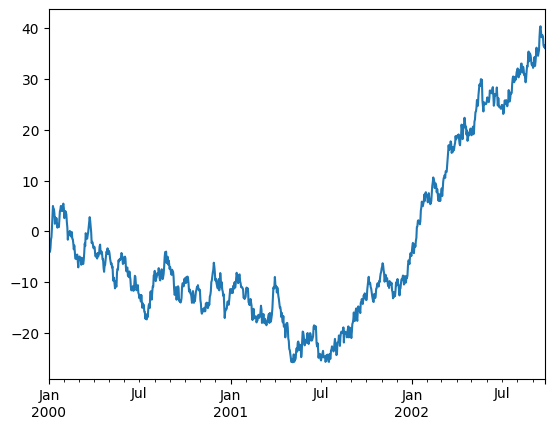

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

- 在DataFrame上，該`plot()`方法可以方便地使用標籤繪製所有列：


In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

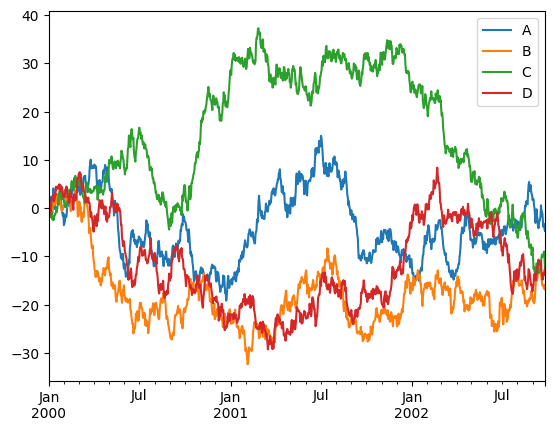

In [ ]:
df.plot()
plt.legend(loc='best')

## Getting data in/out 資料讀取、輸出

### CSV



- [Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv)

In [ ]:
df.to_csv('foo.csv')

- [Reading from a csv file](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table)


### HDF5


讀寫[HDFStores](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5)


- 寫入HDF5儲存資料


In [ ]:
df.to_hdf('foo.h5', 'df')

- 讀取HDF5格式資料

In [ ]:
pd.read_hdf('foo.h5', 'df').head()

,A,B,C,D
2000-01-01,1.755790,0.546746,-0.008336,-2.151521
2000-01-02,0.287822,1.072701,-1.516456,-1.350527
2000-01-03,2.282846,0.495920,-1.809580,-0.544204
2000-01-04,1.894291,0.405611,-0.856482,-0.714284
2000-01-05,1.130493,0.481064,-1.814715,-0.462107


### Excel


讀寫[MS Excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel)

- 寫入excel檔案

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

- 讀取excel檔案


In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.755790,0.546746,-0.008336,-2.151521
1,2000-01-02,0.287822,1.072701,-1.516456,-1.350527
2,2000-01-03,2.282846,0.495920,-1.809580,-0.544204
3,2000-01-04,1.894291,0.405611,-0.856482,-0.714284
4,2000-01-05,1.130493,0.481064,-1.814715,-0.462107
...,...,...,...,...,...
995,2002-09-22,-2.927234,-16.061983,-9.951859,-14.460143
996,2002-09-23,-3.894427,-15.872098,-9.520193,-13.543624
997,2002-09-24,-3.263254,-16.679156,-8.986665,-13.850402
998,2002-09-25,-4.233578,-15.952362,-10.064434,-12.862661


## Gotchas 小陷阱


- 如果操作時遇到異常，如:

    ```python
    >>> if pd.Series([False, True, False]):
    ...     print("I was true")
    Traceback
        ...
    ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().
    ```

- 請查看[Comparisons](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-compare)來處理異常，或查看[Gotchas](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas)也可以.